# Small Dataset Experiments

In [5]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.lines as mlines

sys.path.append(os.path.abspath("../.."))

from src.utils import plot_graph, plot_colored_graph, loading_graphs

from src.loading_data import load_graph
from src.algorithm import run_genetic_algorithm
from src.genetic_operators import ( tournament_selection, roulette_wheel_selection
                                , single_point_crossover, uniform_crossover
                                , swap_mutation, random_resetting)

Small Graph Loaded
Nodes: 11
Edges: 20


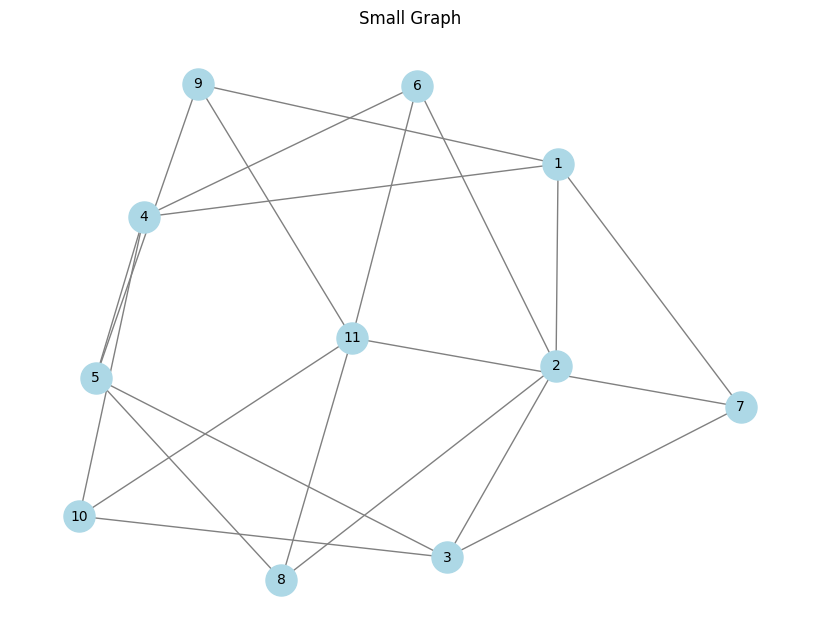

In [6]:
dataset = "../../data/myciel3.col.txt"
graph = loading_graphs(dataset, size="Small")
num_nodes = graph.number_of_nodes()

plot_graph(graph, title="Small Graph")

## Experiments

In [7]:
POP_SIZE = 20
MAX_GEN = 50
MUT_RATE = 0.1
MAX_COLORS = 5

# Experiments (Name, Selection, Crossover, Mutation)
experiments = [
    ("Experiment 1", tournament_selection, single_point_crossover, swap_mutation),
    ("Experiment 2", tournament_selection, uniform_crossover, random_resetting),
    ("Experiment 3", roulette_wheel_selection, single_point_crossover, random_resetting),
    ("Experiment 4", tournament_selection, single_point_crossover, swap_mutation),
    ("Experiment 5", tournament_selection, uniform_crossover, swap_mutation),
    ("Experiment 6", roulette_wheel_selection, uniform_crossover, swap_mutation)
]

results_table = []
best_overall_ind = None

print(f"Running Experiments for {dataset}\n")

for name, s_func, c_func, m_func in experiments:
    print(f"Executing {name}...")

    best_ind, history = run_genetic_algorithm(
        graph=graph,
        pop_size=POP_SIZE,
        max_generations=MAX_GEN,
        max_colors=MAX_COLORS,
        selection_func=s_func,
        crossover_func=c_func,
        mutation_func=m_func,
        mutation_rate=MUT_RATE,
    )

    # Store Results
    results_table.append({
        "Experiment": name,
        "Selection": s_func.__name__,
        "Crossover": c_func.__name__,
        "Mutation": m_func.__name__,
        "Best Fitness": round(best_ind.fitness, 4),
        "Conflicts": best_ind.conflicts,
        "Total Colors": len(set(best_ind.genes))
    })

    # Store Best Overall Individual
    if best_overall_ind is None or best_ind.fitness > best_overall_ind.fitness:
        best_overall_ind = best_ind
        best_history = history

Running Experiments for ../../data/myciel3.col.txt

Executing Experiment 1...
Executing Experiment 2...
Executing Experiment 3...
Executing Experiment 4...
Executing Experiment 5...
Executing Experiment 6...



Results Table
  Experiment                Selection              Crossover         Mutation  Best Fitness  Conflicts  Total Colors
Experiment 1     tournament_selection single_point_crossover    swap_mutation          1.25          0             4
Experiment 2     tournament_selection      uniform_crossover random_resetting          1.25          0             4
Experiment 3 roulette_wheel_selection single_point_crossover random_resetting          1.25          0             4
Experiment 4     tournament_selection single_point_crossover    swap_mutation          1.20          0             5
Experiment 5     tournament_selection      uniform_crossover    swap_mutation          1.25          0             4
Experiment 6 roulette_wheel_selection      uniform_crossover    swap_mutation          1.25          0             4

Best Overall Individual:


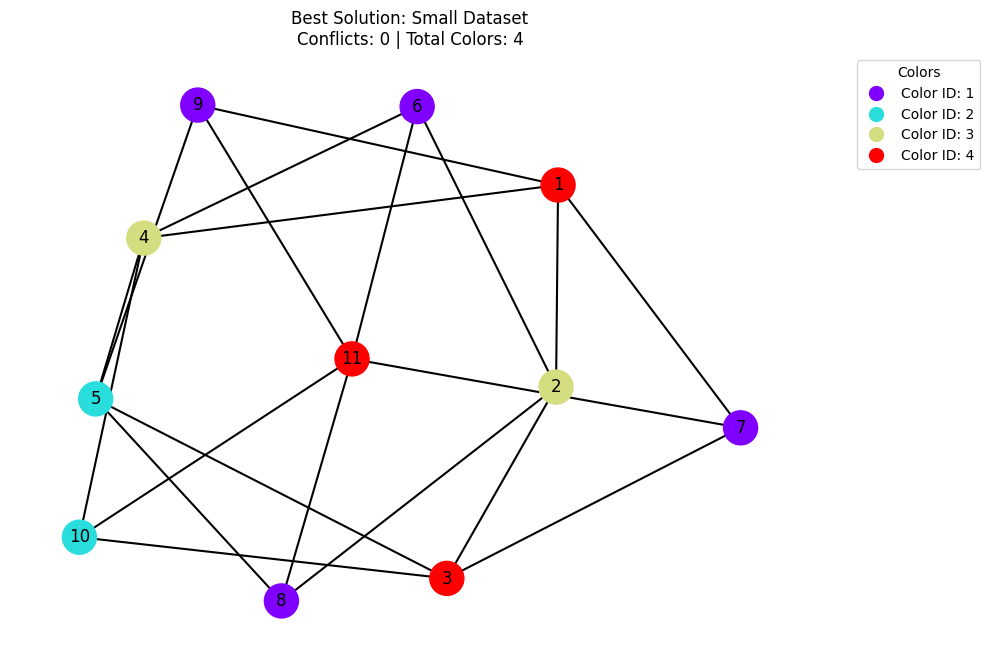

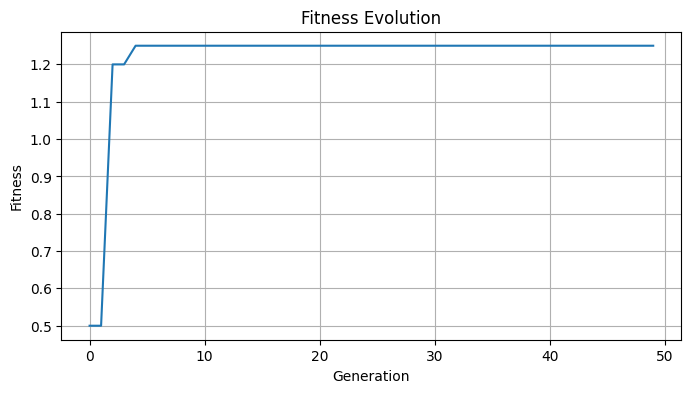

In [8]:
df = pd.DataFrame(results_table)
print("\nResults Table")
print(df.to_string(index=False))

if best_overall_ind:
    print("\nBest Overall Individual:")
    plot_colored_graph(graph, best_overall_ind, title=f"Best Solution: Small Dataset")

    plt.figure(figsize=(8, 4))
    plt.plot(best_history)
    plt.title("Fitness Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.grid(True)
    plt.show()